In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Clean Up Ride Data
city_rides=pd.DataFrame(ride_data.groupby(['city'])['ride_id'].count()).reset_index()
city_rides=city_rides.rename(columns={"ride_id":"total_rides"})

city_avgfare=pd.DataFrame(ride_data.groupby(['city'])['fare'].mean()).reset_index()
city_avgfare=city_avgfare.rename(columns={"fare":"avg_fare"})


# Combine the data into a single dataset
pyber_data=pd.merge(city_data,city_rides,on="city",how="outer")
pyber_data=pd.merge(pyber_data,city_avgfare,on="city",how="outer")


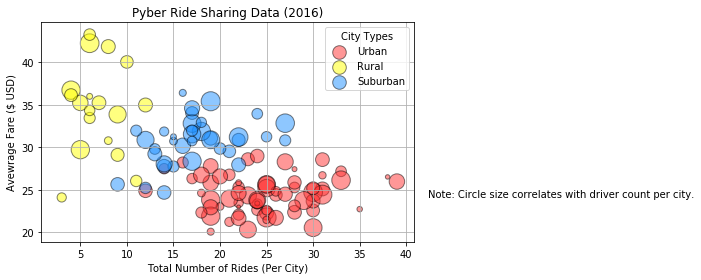

In [2]:
# ## Bubble Plot of Ride Sharing Data

# Subset by City Type
pyber_data_urban=pyber_data.loc[(pyber_data["type"]=="Urban"),:]
pyber_data_rural=pyber_data.loc[(pyber_data["type"]=="Rural"),:]
pyber_data_suburban=pyber_data.loc[(pyber_data["type"]=="Suburban"),:]


# Bubble Plot
urban_plot=plt.scatter(pyber_data_urban["total_rides"],pyber_data_urban["avg_fare"], 
            color="#FF3030",s=pyber_data["driver_count"]*5,
            edgecolor="black",alpha=0.5, 
            label="Urban" )

rural_plot=plt.scatter(pyber_data_rural["total_rides"],pyber_data_rural["avg_fare"], 
            color="yellow",s=pyber_data["driver_count"]*5,
            edgecolor="black",alpha=0.5,
            label="Rural")

suburban_plot=plt.scatter(pyber_data_suburban["total_rides"],pyber_data_suburban["avg_fare"], 
            color="#1E90FF",s=pyber_data["driver_count"]*5,
            edgecolor="black",alpha=0.5,
            label="Suburban")

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Avewrage Fare ($ USD)")

plt.grid()
plt.tight_layout()

# Plotting Legends
plt.legend(handles=[urban_plot, rural_plot,suburban_plot],title="City Types", loc="best",
           fontsize = 'medium')

textstr="Note: Circle size correlates with driver count per city."
plt.text(1.0, 0.3, textstr, fontsize=10, transform=plt.gcf().transFigure)

# Save & Display Figure
plt.savefig("Pyber_001.png")
plt.show()

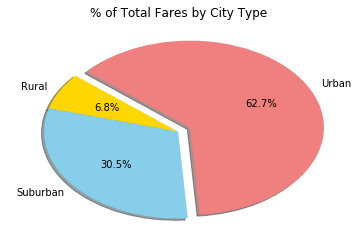

In [3]:
# ## Total Fares by City Type

# Labels for the secionts of our pie chart
labels=["Urban","Rural","Suburban"]

# Calculate Type Percents
pyber_rides=pd.merge(city_data,ride_data,on="city",how="outer")
round(pyber_rides["fare"].sum(),2) #63538.64

fare_by_citytype=pd.DataFrame(pyber_rides.groupby(['type'])['fare'].sum()).reset_index()
y_variable=fare_by_citytype["fare"]
x_variables=fare_by_citytype["type"]
colors = ["gold", "skyblue", "lightcoral"]
explode = (0,0,0.1) 

# Build Pie Chart
plt.title("% of Total Fares by City Type")
plt.pie(y_variable,explode = explode,labels=x_variables, colors=colors,autopct="%1.1f%%",
        shadow=True,startangle=140)


# Save & Display Figure
plt.savefig("Pyber_002.png")
plt.show()

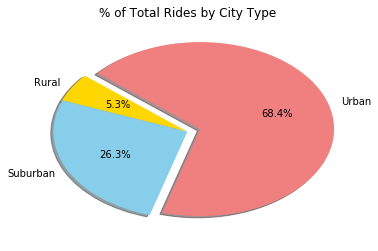

In [4]:
#### Total Rides by City Type

# Calculate Ride Percents
rides_by_citytype=pd.DataFrame(pyber_rides.groupby(['type'])['ride_id'].count()).reset_index()
rides_y_variable=rides_by_citytype["ride_id"]
x_variables=rides_by_citytype["type"]
colors = ["gold", "skyblue", "lightcoral"]
explode = (0,0,0.1) 


# Build Pie Chart
plt.title("% of Total Rides by City Type")
plt.pie(rides_y_variable,explode = explode,labels=x_variables, colors=colors,autopct="%1.1f%%",
        shadow=True,startangle=140)

# Save & Display Figure
plt.savefig("Pyber_003.png")
plt.show()

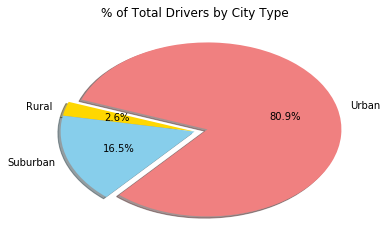

In [5]:
#### Total Drivers by City Type

# Calculate Driver Percents
drivers_by_citytype=pd.DataFrame(city_data.groupby(['type'])['driver_count'].sum()).reset_index()
drivers_y_variable=drivers_by_citytype["driver_count"]
x_variables=drivers_by_citytype["type"]
colors = ["gold", "skyblue", "lightcoral"]
explode = (0,0,0.1) 


# Build Pie Chart
plt.title("% of Total Drivers by City Type")
plt.pie(drivers_y_variable,explode = explode,labels=x_variables, colors=colors,autopct="%1.1f%%",
        shadow=True,startangle=160)

# Save & Display Figure
plt.savefig("Pyber_004.png")
plt.show()